# **Scene Text recognition using RestNet andTransformer¶**



# **1. Description**

There are alots of images which contain words or group of words . So it was challenging to scrap the given word from the image . Traditional optical character recognition (OCR) were used to detect the image . So, researcher have come across with an idea which help scrapping words from image using the combine concept of RestNet and Transformer more efficiently.

## **1.1Problem Statement**

*   To predict the characters for given image 

# **1.2 Sources/Useful Links**

*   IIIT 5K-word dataset :- http://cvit.iiit.ac.in/research/projects/cvit-projects/the-iiit-5k-word-dataset




# **2. Deep Learning Problem**

#**2.1 Performance Metric**

*   We have used custom accuracy metric which is the ratio of  total number of character sequence matching for given predicted and groundtruth charcter list divided by total number of character.



# **3. Exploratory Data Analysis**

Since we are using IIIT 5K-word dataset which contain total of 5000 text images with its corresponding Annotation file in the for of .mat format. We have to extract the image with its character strings.

In [3]:
import os
from PIL import Image
import cv2
import numpy as np
import tensorflow as tf
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.io

##  **Importing .mat file into pythondictionary**

In [ ]:
# Import to a python dictionary
mat1 = scipy.io.loadmat('trainCharBound.mat')
mat2 = scipy.io.loadmat('testCharBound.mat')

In [ ]:
dic = {}

for i in mat1['trainCharBound'][0]:
  dic['/content/drive/MyDrive/data/image_file/images/'+i[0][0][6:]] = i[1][0]

for i in mat2['testCharBound'][0]:
  dic['/content/drive/MyDrive/data/image_file/images/'+i[0][0][5:]] = i[1][0]


In [ ]:
#saving dictionary into plk file
a_filee = open("data.pkl", "wb")
pickle. dump(dic, a_filee)
a_filee. close()

In [ ]:
import pickle
a_fil = open("data.pkl", "rb")
output = pickle. load(a_fil)
a_fil. close()

In [ ]:
v = [] #storing word charcter of image into list
for file in file_name:
  v.append(output['/content/drive/MyDrive/data/image_file/images/'+file])

In [ ]:
len(file_name)

5000

## **For Model '1' storing image of size 48 * 60 with 3 channels** 

In [ ]:
# for model '1' storing image of size 48 * 60 with 3 channels
height , width = 48 , 160 #size to which input image needs to resize

file_name = []
for infile in os.listdir('images'):
    file_name.append(infile)

lists = []
for file in file_name:
  images = tf.io.read_file('/content/drive/MyDrive/data/image_file/images/'+file)
  images = tf.image.decode_jpeg(images, channels=3) #Decode a JPEG-encoded image to a uint8 tensor
  images = tf.image.resize(images, [height, width]) #resizing image to input shape of model
  images = tf.cast(images, tf.float32) / 255.0 # normalizing image
  lists.append(images)

In [ ]:
#saving image array list into pkl file
files1 = open("image_lists1.pkl", "wb")
pickle.dump(lists, files1)
files1.close() 

#saving char  list into pkl file
files2 = open("chars.pkl", "wb")
pickle.dump(v, files2)
files2.close() 

# For Model '2' storing image of size 96 * 96 with 3 channels

In [ ]:
# for model '2' storing image of size 48 * 60 with 3 channels
height , width = 96 , 96      #size to which input image needs to resize

file_name = []
for infile in os.listdir('images'):
    file_name.append(infile)

lists = []
for file in file_name:
  images = tf.io.read_file('/content/drive/MyDrive/data/image_file/images/'+file)
  images = tf.image.decode_jpeg(images, channels=3) #Decode a JPEG-encoded image to a uint8 tensor
  images = tf.image.resize(images, [height, width]) #resizing image to input shape of model
  images = tf.cast(images, tf.float32) / 255.0 # normalizing image
  lists.append(images)

In [ ]:
#saving image array list into pkl file
files1 = open("image_lists2.pkl", "wb")
pickle.dump(lists, files1)
files1.close() 

# Diplaying Image and its corresponding words

In [11]:
import pickle
a_fil = open("image_lists1.pkl", "rb")
lists = pickle.load(a_fil)
a_fil.close()

In [ ]:
import pickle
a_fil = open("data.pkl", "rb")
output = pickle. load(a_fil)
a_fil. close()

In [14]:
file_name = []
for infile in os.listdir('images'):
    file_name.append(infile)

In [15]:
v = [] #storing word charcter of image into list
for file in file_name:
  v.append(output['/content/drive/MyDrive/data/image_file/images/'+file])

In [19]:
dataset = tf.data.Dataset.from_tensor_slices((lists, v))
dataset

<TensorSliceDataset shapes: ((1, 96, 96, 3), ()), types: (tf.float32, tf.string)>

In [20]:
BUFFER_SIZE = 20000
BATCH_SIZE = 1
def make_batches(ds):
  return (
      ds
      .cache()
      .shuffle(BUFFER_SIZE)
      .batch(BATCH_SIZE)
      .prefetch(tf.data.AUTOTUNE))



train_batches = make_batches(dataset)

tf.Tensor([b'FM'], shape=(1,), dtype=string)


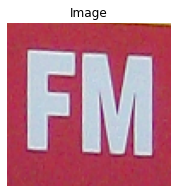

tf.Tensor([b'Anson'], shape=(1,), dtype=string)


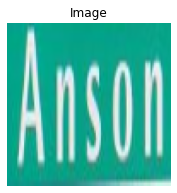

tf.Tensor([b'Money'], shape=(1,), dtype=string)


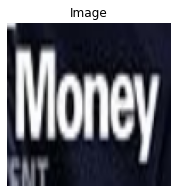

tf.Tensor([b'HOLLY'], shape=(1,), dtype=string)


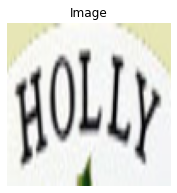

tf.Tensor([b'Cottage'], shape=(1,), dtype=string)


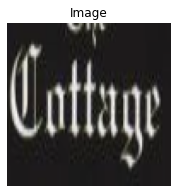

In [29]:
for (batch, (inp, tar)) in enumerate(train_batches):
  if batch == 5:
    break
  plt.figure(figsize=(3, 3))        
  plt.title('Image' )
  plt.imshow(tf.keras.preprocessing.image.array_to_img(inp[0][0]))
  print(str(tar))
  plt.axis('off')
  plt.show()   
  